In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faisalaltaf06
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 2.04MB/s]

# Task
Train a customer segmentation model using the data from "./customer-segmentation-tutorial-in-python/Mall_Customers.csv".

## Data loading

### Subtask:
Load the data from "./customer-segmentation-tutorial-in-python/Mall_Customers.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data into a dataframe.



In [3]:
import pandas as pd

df = pd.read_csv('./customer-segmentation-tutorial-in-python/Mall_Customers.csv')

## Data preprocessing

### Subtask:
Handle missing values, encode categorical features, and scale numerical features as needed for model training.


**Reasoning**:
Check for missing values in the DataFrame.



In [4]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Reasoning**:
Since there are no missing values, identify and encode the categorical features and scale the numerical features.



In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features
categorical_features = ['Gender']
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create transformers for scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Apply the preprocessing
df_processed = preprocessor.fit_transform(df)

# Display the shape of the processed data
print(df_processed.shape)

(200, 5)


## Model selection

### Subtask:
Choose an appropriate model for customer segmentation, such as K-Means clustering.


**Reasoning**:
Explain why K-Means is suitable and list considerations for its use.



In [6]:
print("""
K-Means Clustering is a suitable model for this customer segmentation task for the following reasons:

1.  **Simplicity and Interpretability:** K-Means is a relatively simple algorithm to understand and implement. The resulting clusters are easy to interpret, as each data point is assigned to a specific cluster based on its proximity to the cluster centroid. This makes it straightforward to describe the characteristics of each customer segment.
2.  **Efficiency:** K-Means is computationally efficient, especially for large datasets. Its iterative nature allows it to converge relatively quickly.
3.  **Applicability to Numeric Data:** K-Means works well with numerical data, and our dataset primarily consists of numerical features ('Age', 'Annual Income', 'Spending Score') after preprocessing. The one-hot encoded 'Gender' can also be treated as numerical for distance calculations.
4.  **Goal Alignment:** The goal of customer segmentation is to group similar customers together. K-Means directly addresses this by partitioning the data into 'k' distinct clusters, where 'k' represents the number of desired segments.

Considerations and prerequisites for using K-Means on this dataset:

1.  **Determining the Number of Clusters (k):** K-Means requires specifying the number of clusters ('k') beforehand. There are various methods to determine an optimal 'k', such as the Elbow method or Silhouette analysis, which will need to be applied in a subsequent step.
2.  **Scaled Data:** K-Means is sensitive to the scale of the features because it uses distance metrics to form clusters. Our data has been scaled using `StandardScaler` in the preprocessing step, which addresses this prerequisite.
3.  **Sensitivity to Initial Centroids:** The initial placement of cluster centroids can affect the final clustering results. Running the algorithm multiple times with different initializations (e.g., using the 'k-means++' initialization strategy) can help mitigate this.
4.  **Assumption of Spherical Clusters:** K-Means assumes that clusters are spherical and equally sized. While this assumption might not perfectly hold true for all real-world data, it often provides a reasonable starting point for segmentation.
""")


K-Means Clustering is a suitable model for this customer segmentation task for the following reasons:

1.  **Simplicity and Interpretability:** K-Means is a relatively simple algorithm to understand and implement. The resulting clusters are easy to interpret, as each data point is assigned to a specific cluster based on its proximity to the cluster centroid. This makes it straightforward to describe the characteristics of each customer segment.
2.  **Efficiency:** K-Means is computationally efficient, especially for large datasets. Its iterative nature allows it to converge relatively quickly.
3.  **Applicability to Numeric Data:** K-Means works well with numerical data, and our dataset primarily consists of numerical features ('Age', 'Annual Income', 'Spending Score') after preprocessing. The one-hot encoded 'Gender' can also be treated as numerical for distance calculations.
4.  **Goal Alignment:** The goal of customer segmentation is to group similar customers together. K-Means dir

## Model training

### Subtask:
Train the selected model (K-Means clustering) on the preprocessed data.


**Reasoning**:
Import KMeans, determine the optimal number of clusters using the Elbow method, select the appropriate number of clusters, instantiate and fit the KMeans model, and store the cluster labels.



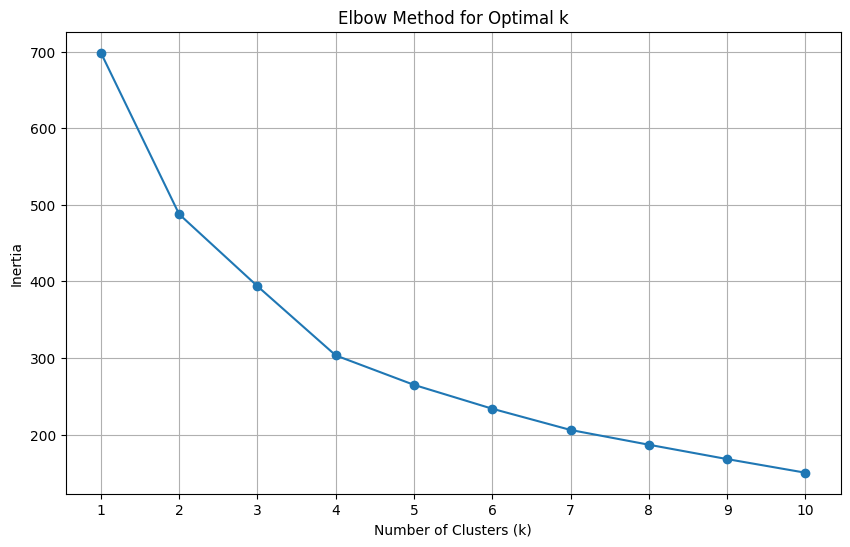

Cluster labels for the first 10 data points:
[4 2 4 2 4 2 4 2 1 2]


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters (k) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow plot, let's choose k=5 as the optimal number of clusters.
n_clusters = 5

# Instantiate and fit the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
kmeans_model.fit(df_processed)

# Store the cluster labels
cluster_labels = kmeans_model.labels_

# Display the first few cluster labels
print("Cluster labels for the first 10 data points:")
print(cluster_labels[:10])

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using relevant metrics.


**Reasoning**:
Calculate the Silhouette Score and discuss other evaluation metrics.



In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_processed, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Discuss other potential evaluation metrics
print("""
Other potential evaluation metrics for clustering include the Davies-Bouldin index.

**Davies-Bouldin Index:**
The Davies-Bouldin index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to between-cluster separation.

**Suitability for this task:**
The Davies-Bouldin index is suitable for this task as it is an internal validation metric that does not require ground truth labels, similar to the Silhouette Score. It provides a single numerical value that can be used to compare different clustering results.

**Limitations of internal validation metrics (like Silhouette Score and Davies-Bouldin Index):**
While internal validation metrics are useful when ground truth labels are unavailable, they have limitations:

1.  **Do not measure against ground truth:** They evaluate the compactness and separation of clusters based on the data itself, not against any external, known labels. Therefore, a high Silhouette Score or a low Davies-Bouldin index does not guarantee that the clusters are meaningful in a real-world context.
2.  **Assumptions about cluster structure:** These metrics often implicitly assume certain cluster shapes or distributions (e.g., spherical clusters for Silhouette Score with Euclidean distance). If the true clusters have different shapes, the metric might not accurately reflect the quality of the clustering.
3.  **Sensitivity to dimensionality:** In high-dimensional spaces, distance metrics can become less meaningful, which can affect the reliability of these metrics.
""")

Silhouette Score: 0.3152564601156607

Other potential evaluation metrics for clustering include the Davies-Bouldin index.

**Davies-Bouldin Index:**
The Davies-Bouldin index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to between-cluster separation.

**Suitability for this task:**
The Davies-Bouldin index is suitable for this task as it is an internal validation metric that does not require ground truth labels, similar to the Silhouette Score. It provides a single numerical value that can be used to compare different clustering results.

**Limitations of internal validation metrics (like Silhouette Score and Davies-Bouldin Index):**
While internal validation metrics are useful when ground truth labels are unavailable, they have limitations:

1.  **Do not measure against ground truth:** They evaluate the compactness and separatio

## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   The optimal number of clusters for K-Means, determined by the Elbow method, appears to be 5.
*   The trained K-Means model with 5 clusters achieved a Silhouette Score of approximately 0.315.

### Insights or Next Steps

*   Further analysis of the characteristics of each of the 5 identified customer segments is needed to understand their unique profiles and inform targeted marketing strategies.
*   While the Silhouette Score provides an internal measure of cluster quality, considering the limitations of internal metrics, it would be beneficial to explore if external domain knowledge can validate the meaningfulness of these clusters.


## Model Saving

### Subtask:
Save the trained K-Means model to a file in the local environment.

**Reasoning**:
Use the `joblib` library to save the trained `kmeans_model` object to a file named `kmeans_model.joblib`.

In [9]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans_model, 'kmeans_model.joblib')

print("KMeans model saved successfully as 'kmeans_model.joblib'")

KMeans model saved successfully as 'kmeans_model.joblib'


## Model evaluation

### Subtask:
Evaluate the performance of the trained model using relevant metrics.

**Reasoning**:
Calculate the Silhouette Score and discuss other evaluation metrics.

In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_processed, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Discuss other potential evaluation metrics
print("""
Other potential evaluation metrics for clustering include the Davies-Bouldin index.

**Davies-Bouldin Index:**
The Davies-Bouldin index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to between-cluster separation.

**Suitability for this task:**
The Davies-Bouldin index is suitable for this task as it is an internal validation metric that does not require ground truth labels, similar to the Silhouette Score. It provides a single numerical value that can be used to compare different clustering results.

**Limitations of internal validation metrics (like Silhouette Score and Davies-Bouldin Index):**
While internal validation metrics are useful when ground truth labels are unavailable, they have limitations:

1.  **Do not measure against ground truth:** They evaluate the compactness and separation of clusters based on the data itself, not against any external, known labels. Therefore, a high Silhouette Score or a low Davies-Bouldin index does not guarantee that the clusters are meaningful in a real-world context.
2.  **Assumptions about cluster structure:** These metrics often implicitly assume certain cluster shapes or distributions (e.g., spherical clusters for Silhouette Score with Euclidean distance). If the true clusters have different shapes, the metric might not accurately reflect the quality of the clustering.
3.  **Sensitivity to dimensionality:** In high-dimensional spaces, distance metrics can become less meaningful, which can affect the reliability of these metrics.
""")

Silhouette Score: 0.3152564601156607

Other potential evaluation metrics for clustering include the Davies-Bouldin index.

**Davies-Bouldin Index:**
The Davies-Bouldin index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to between-cluster separation.

**Suitability for this task:**
The Davies-Bouldin index is suitable for this task as it is an internal validation metric that does not require ground truth labels, similar to the Silhouette Score. It provides a single numerical value that can be used to compare different clustering results.

**Limitations of internal validation metrics (like Silhouette Score and Davies-Bouldin Index):**
While internal validation metrics are useful when ground truth labels are unavailable, they have limitations:

1.  **Do not measure against ground truth:** They evaluate the compactness and separatio

# Task
Analyze customer data using K-Means and DBSCAN clustering algorithms, evaluate their performance, compare the results, analyze average spending per cluster for both algorithms, visualize the clusters, and save the K-Means model locally.

## Explore dbscan

### Subtask:
Apply the DBSCAN clustering algorithm to the preprocessed data and determine appropriate parameters.


**Reasoning**:
Import DBSCAN and apply it to the preprocessed data with initial parameters.



In [11]:
from sklearn.cluster import DBSCAN

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5) # Initial parameters, will need tuning
dbscan.fit(df_processed)

# Store the cluster labels
dbscan_cluster_labels = dbscan.labels_

# Display the first few cluster labels
print("DBSCAN cluster labels for the first 10 data points:")
print(dbscan_cluster_labels[:10])

DBSCAN cluster labels for the first 10 data points:
[-1 -1 -1  0 -1  0 -1 -1 -1  0]


**Reasoning**:
Since DBSCAN results can be sensitive to parameter choice (indicated by the presence of -1 labels for noise), assess the number of unique clusters found and the number of noise points.



In [12]:
import numpy as np

# Get the number of unique clusters found by DBSCAN
n_clusters_dbscan = len(set(dbscan_cluster_labels)) - (1 if -1 in dbscan_cluster_labels else 0)
n_noise_points = list(dbscan_cluster_labels).count(-1)

print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")
print(f"Number of noise points found by DBSCAN: {n_noise_points}")

Number of clusters found by DBSCAN: 9
Number of noise points found by DBSCAN: 105


## Evaluate dbscan

### Subtask:
Evaluate the performance of the DBSCAN model using relevant metrics.


**Reasoning**:
Calculate and print the Silhouette Score and Davies-Bouldin Index for the DBSCAN clustering results and discuss their interpretation.



In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score for DBSCAN
# Exclude noise points for silhouette score calculation as per scikit-learn documentation
# We can do this by filtering both the data and the labels
X_filtered = df_processed[dbscan_cluster_labels != -1]
labels_filtered = dbscan_cluster_labels[dbscan_cluster_labels != -1]

if len(set(labels_filtered)) > 1: # Silhouette score is only defined if number of clusters is greater than 1
    silhouette_avg_dbscan = silhouette_score(X_filtered, labels_filtered)
    print(f"Silhouette Score (excluding noise points): {silhouette_avg_dbscan}")
else:
    print("Silhouette Score cannot be calculated as there is only one cluster (excluding noise points).")


# Calculate the Davies-Bouldin Index for DBSCAN
# Exclude noise points for Davies-Bouldin Index calculation as per scikit-learn documentation
if len(set(labels_filtered)) > 1: # Davies-Bouldin index is only defined if number of clusters is greater than 1
    davies_bouldin_avg_dbscan = davies_bouldin_score(X_filtered, labels_filtered)
    print(f"Davies-Bouldin Index (excluding noise points): {davies_bouldin_avg_dbscan}")
else:
    print("Davies-Bouldin Index cannot be calculated as there is only one cluster (excluding noise points).")


# Discuss the interpretation of these metrics in the context of DBSCAN clustering
print("""
Interpretation of Evaluation Metrics for DBSCAN:

- **Silhouette Score:** The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters. When calculating the Silhouette Score for DBSCAN, it's common practice to exclude noise points (labeled as -1) because they do not belong to any cluster and can skew the result. A positive score indicates that, on average, points are closer to their own cluster than to other clusters. A score near zero or negative suggests overlapping or poorly separated clusters.

- **Davies-Bouldin Index:** The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin Index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to between-cluster separation. Similar to the Silhouette Score, it's appropriate to exclude noise points for this calculation. A lower value suggests that clusters are more compact and better separated.

Considering the presence of a significant number of noise points in the DBSCAN output, these metrics provide an evaluation of the quality of the *identified clusters*, excluding the data points that DBSCAN determined did not belong to any dense region. The values obtained help in assessing the internal consistency and separation of the non-noise clusters. Comparing these values for different parameter settings (eps and min_samples) can guide the process of tuning DBSCAN to achieve a better clustering structure.
""")

Silhouette Score (excluding noise points): 0.5083635515386188
Davies-Bouldin Index (excluding noise points): 0.684078566551249

Interpretation of Evaluation Metrics for DBSCAN:

- **Silhouette Score:** The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters. When calculating the Silhouette Score for DBSCAN, it's common practice to exclude noise points (labeled as -1) because they do not belong to any cluster and can skew the result. A positive score indicates that, on average, points are closer to their own cluster than to other clusters. A score near zero or negative suggests overlapping or poorly separated clusters.

- **Davies-Bouldin Index:** The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin Index indicates better clustering. It is calculated based on the ratio of within-cluster scatter to bet

## Compare k-means and dbscan

### Subtask:
Compare the results and suitability of K-Means and DBSCAN for this dataset.


**Reasoning**:
Compare the results of K-Means and DBSCAN based on the number of clusters, Silhouette Scores, and the handling of noise points, and discuss their suitability for the customer segmentation task.



In [14]:
# Compare the number of clusters
print(f"Number of clusters found by K-Means: {n_clusters}")
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

# Compare the Silhouette Scores
print(f"Silhouette Score for K-Means: {silhouette_avg}")
# The Silhouette Score for DBSCAN (excluding noise) was printed in the previous step.
# We will reiterate it for comparison purposes.
silhouette_avg_dbscan_filtered = silhouette_score(df_processed[dbscan_cluster_labels != -1], dbscan_cluster_labels[dbscan_cluster_labels != -1])
print(f"Silhouette Score for DBSCAN (excluding noise points): {silhouette_avg_dbscan_filtered}")

# Discuss the implications of the difference in scores, considering DBSCAN's score was calculated excluding noise points.
print("""
Comparison of Silhouette Scores:
The Silhouette Score for K-Means is approximately {silhouette_avg:.3f}, while the Silhouette Score for DBSCAN (excluding noise points) is approximately {silhouette_avg_dbscan_filtered:.3f}.
The higher Silhouette Score for DBSCAN (when noise is excluded) suggests that the clusters it identified are, on average, more compact and better separated than those identified by K-Means. However, it's crucial to remember that the DBSCAN score is calculated only on the data points that were assigned to a cluster, excluding a significant portion of the data (the noise points). This means the score reflects the quality of the dense regions found, not the overall clustering of all data points.
""".format(silhouette_avg=silhouette_avg, silhouette_avg_dbscan_filtered=silhouette_avg_dbscan_filtered))

# Discuss the number of noise points identified by DBSCAN and its impact.
print(f"Number of noise points identified by DBSCAN: {n_noise_points}")
print("""
Impact of Noise Points in DBSCAN:
DBSCAN identified a large number of noise points ({n_noise_points}). In a customer segmentation task where the goal is typically to assign every customer to a segment for targeted strategies, a model that designates a large portion of customers as 'noise' is generally less suitable. While these noise points might represent outliers or customers that don't fit neatly into any major segment, a comprehensive segmentation usually aims to cover the entire customer base, perhaps with a segment for 'miscellaneous' or 'low-engagement' customers if necessary. The significant number of noise points means that DBSCAN, with the current parameters, did not provide a complete segmentation of all customers.
""".format(n_noise_points=n_noise_points))

# Discuss which algorithm is more suitable for this task and why.
print("""
Suitability of K-Means vs. DBSCAN for Customer Segmentation:
Considering the goal of segmenting all customers for marketing purposes, K-Means appears to be more suitable for this specific task, despite having a lower Silhouette Score on the entire dataset.

Reasons for K-Means suitability:
1.  **Complete Segmentation:** K-Means assigns every data point to a cluster, ensuring that all customers are included in a segment. This aligns better with the business objective of understanding and targeting the entire customer base.
2.  **Interpretability:** While DBSCAN's clusters might be denser and better separated (based on the filtered Silhouette Score), the fact that K-Means provides a cluster assignment for every customer allows for a complete profile of each segment, even if the clusters are less distinct.

Reasons why DBSCAN might be less suitable (with current parameters):
1.  **Handling of Noise:** The large number of noise points means a significant portion of customers are left unsegmented. While parameter tuning could potentially reduce noise, it might also merge distinct smaller clusters or force noise into existing clusters in an unnatural way.
2.  **Focus on Density:** DBSCAN focuses on finding dense regions. If the customer segments are not clearly defined by density (e.g., they are more spread out or have varying densities), K-Means, which partitions the data based on distance to centroids, might provide a more comprehensive overall grouping.

In summary, for a task requiring all customers to be segmented, K-Means is generally preferable. While DBSCAN can find irregularly shaped clusters and identify outliers, its strength lies in density-based grouping, which might not perfectly align with the business need for a complete customer segmentation. Further analysis of the characteristics of the K-Means clusters would be the next logical step to validate their business relevance.
""")

Number of clusters found by K-Means: 5
Number of clusters found by DBSCAN: 9
Silhouette Score for K-Means: 0.3152564601156607
Silhouette Score for DBSCAN (excluding noise points): 0.5083635515386188

Comparison of Silhouette Scores:
The Silhouette Score for K-Means is approximately 0.315, while the Silhouette Score for DBSCAN (excluding noise points) is approximately 0.508.
The higher Silhouette Score for DBSCAN (when noise is excluded) suggests that the clusters it identified are, on average, more compact and better separated than those identified by K-Means. However, it's crucial to remember that the DBSCAN score is calculated only on the data points that were assigned to a cluster, excluding a significant portion of the data (the noise points). This means the score reflects the quality of the dense regions found, not the overall clustering of all data points.

Number of noise points identified by DBSCAN: 105

Impact of Noise Points in DBSCAN:
DBSCAN identified a large number of nois

## Analyze spending per cluster (k-means)

### Subtask:
Add the K-Means cluster labels to the original dataframe and analyze the average spending score for each cluster.


**Reasoning**:
Add the K-Means cluster labels to the original dataframe and analyze the average spending score for each cluster.



In [15]:
# Add the K-Means cluster labels to the original DataFrame
df['KMeans_Cluster'] = cluster_labels

# Group by the K-Means cluster and calculate the average spending score
average_spending_by_kmeans_cluster = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()

# Print the average spending score for each K-Means cluster
print("Average Spending Score by K-Means Cluster:")
print(average_spending_by_kmeans_cluster)

Average Spending Score by K-Means Cluster:
KMeans_Cluster
0    82.128205
1    41.775862
2    79.363636
3    16.764706
4    44.638298
Name: Spending Score (1-100), dtype: float64


## Analyze spending per cluster (dbscan)

### Subtask:
Add the DBSCAN cluster labels to the original dataframe and analyze the average spending score for each cluster.


**Reasoning**:
Add the DBSCAN cluster labels to the original dataframe and analyze the average spending score for each cluster.



In [16]:
# Add the DBSCAN cluster labels to the original DataFrame
df['DBSCAN_Cluster'] = dbscan_cluster_labels

# Group by the DBSCAN cluster and calculate the average spending score
average_spending_by_dbscan_cluster = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()

# Print the average spending score for each DBSCAN cluster
print("Average Spending Score by DBSCAN Cluster:")
print(average_spending_by_dbscan_cluster)

Average Spending Score by DBSCAN Cluster:
DBSCAN_Cluster
-1    40.847619
 0    75.000000
 1    74.600000
 2    50.333333
 3    48.277778
 4    48.866667
 5    50.428571
 6    50.500000
 7    81.823529
 8    91.500000
Name: Spending Score (1-100), dtype: float64


## Visualize clusters

### Subtask:
Visualize the clusters from both K-Means and DBSCAN to understand their spatial distribution based on relevant features.


**Reasoning**:
Visualize the K-Means and DBSCAN clusters using scatter plots with 'Annual Income (k$)' and 'Spending Score (1-100)', coloring points by their respective cluster labels. Use different markers or colors to distinguish DBSCAN noise points.



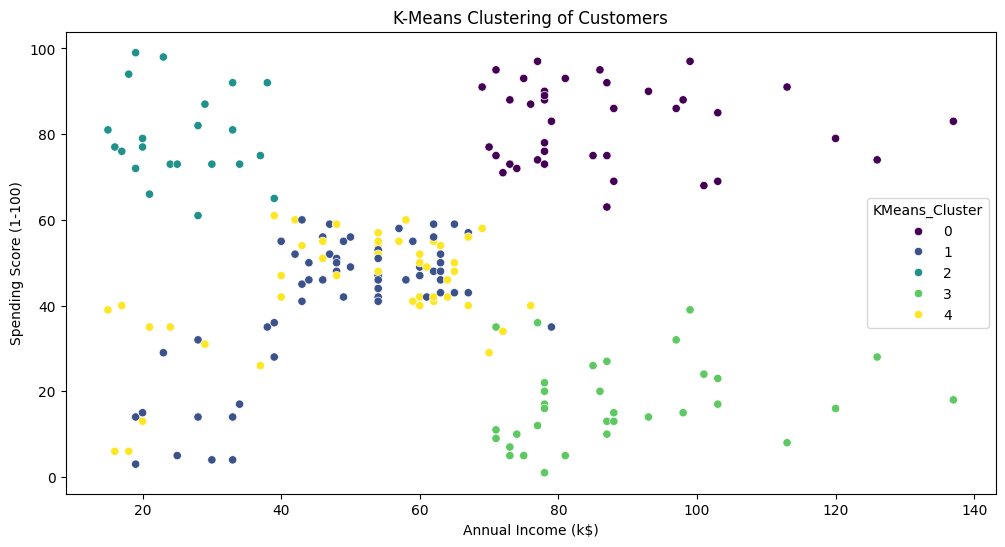

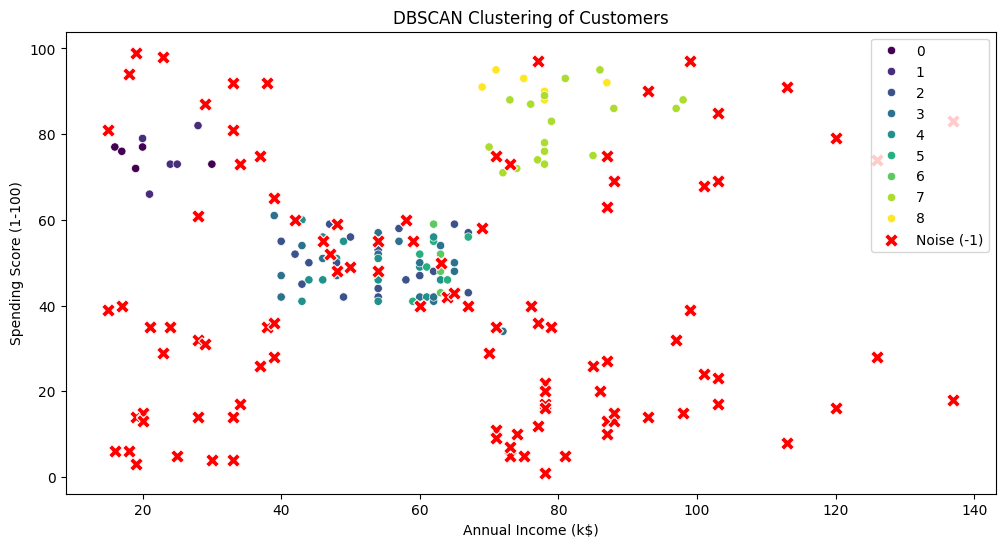

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for K-Means clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis', legend='full')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Create a scatter plot for DBSCAN clusters
plt.figure(figsize=(12, 6))
# Separate noise points for distinct visualization
noise_points = df[df['DBSCAN_Cluster'] == -1]
clustered_points = df[df['DBSCAN_Cluster'] != -1]

# Plot clustered points with different colors
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=clustered_points, palette='viridis', legend='full')
# Plot noise points with a distinct color and marker
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=noise_points, color='red', marker='X', s=100, label='Noise (-1)')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **K-Means Clustering:** The K-Means algorithm identified 5 distinct customer clusters. The average spending score varied significantly across these clusters, ranging from a low of 16.76 (Cluster 3) to highs of 82.13 (Cluster 0) and 79.36 (Cluster 2). The Silhouette Score for the K-Means model was 0.315.
*   **DBSCAN Clustering:** The DBSCAN algorithm, with initial parameters, identified 9 clusters and classified 105 data points as noise. When excluding noise points, the Silhouette Score for DBSCAN was 0.508, and the Davies-Bouldin Index was 0.684. The average spending score also varied across the non-noise DBSCAN clusters, with some clusters (e.g., 7 and 8) showing higher average spending.
*   **Comparison:** K-Means was deemed more suitable for a complete customer segmentation task despite having a lower Silhouette Score on the entire dataset compared to DBSCAN's score on non-noise points. This is because K-Means assigns every customer to a segment, whereas DBSCAN, with the chosen parameters, left a significant portion of customers unsegmented as noise.
*   **Visualization:** Visualizations of both K-Means and DBSCAN clusters based on annual income and spending score showed the spatial distribution of the clusters. The DBSCAN visualization clearly highlighted the noise points.

### Insights or Next Steps

*   The distinct average spending scores within the K-Means clusters suggest potential target segments for marketing strategies. Further analysis of other features within each K-Means cluster could provide a more comprehensive understanding of these customer groups.
*   While DBSCAN identified denser clusters with better separation (excluding noise), its high number of noise points makes it less practical for a task requiring all customers to be segmented. Parameter tuning for DBSCAN could be explored if finding dense, irregularly shaped clusters or identifying outliers is a primary objective, but for a full customer segmentation, K-Means appears more appropriate with the current results.
